In [1]:
from causal_nh.utils import generate_synthetic_dataset, plot_sample_ts, safe_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
%matplotlib inline

In [7]:
dim_process = 10


if dim_process == 2:
    A = np.array([[0.2, 0],
                  [0.1, 0.2]])
else:
    A = np.random.random((dim_process, dim_process))
#     A = A + np.eye(N = dim_process)
    A[A >= 0.5] = 1
    A[A < 0.5] = 0
    A = A*0.2



dataset, intensities = generate_synthetic_dataset(type_size=dim_process,
                                                  adjacency=A,
                                                  len_dataset=300,
                                                  baseline_intensity=0.5)

In [8]:
A

array([[0.2, 0.2, 0. , 0.2, 0. , 0.2, 0. , 0. , 0.2, 0. ],
       [0.2, 0.2, 0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0.2, 0. ],
       [0.2, 0. , 0.2, 0. , 0. , 0. , 0.2, 0.2, 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0.2, 0. , 0.2],
       [0.2, 0. , 0. , 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0.2, 0.2, 0. , 0. , 0.2, 0. , 0. ],
       [0.2, 0. , 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2, 0. ],
       [0.2, 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]])

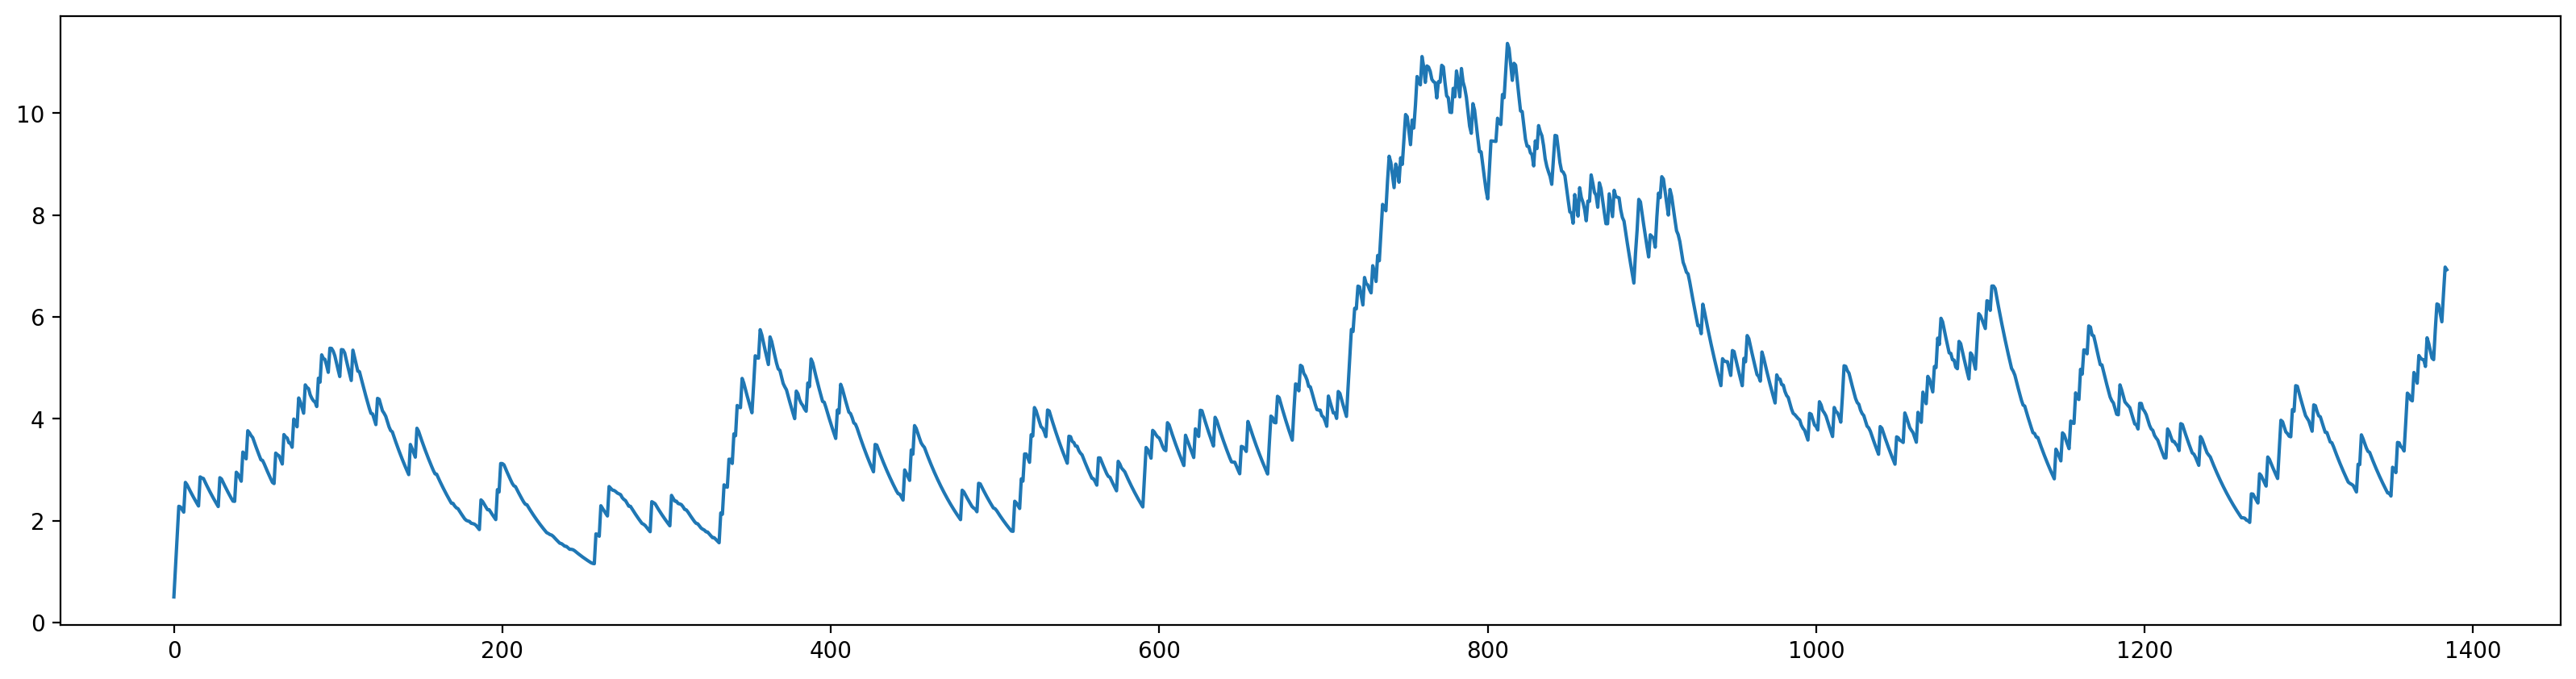

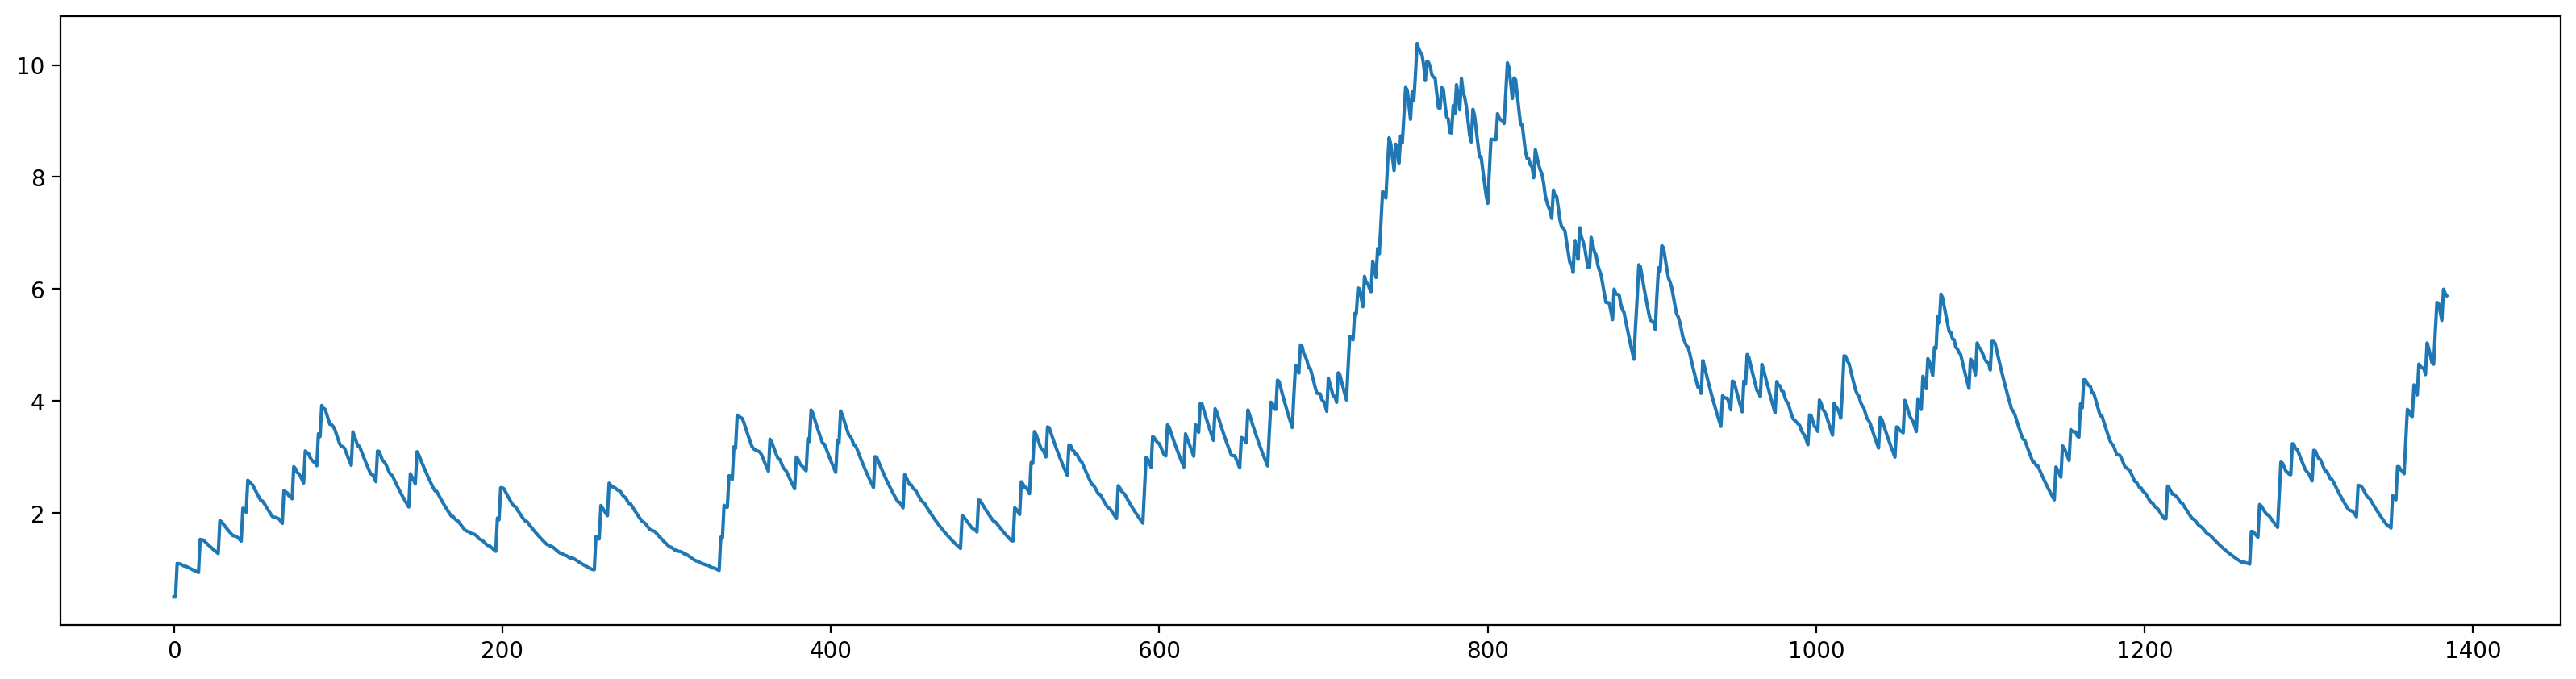

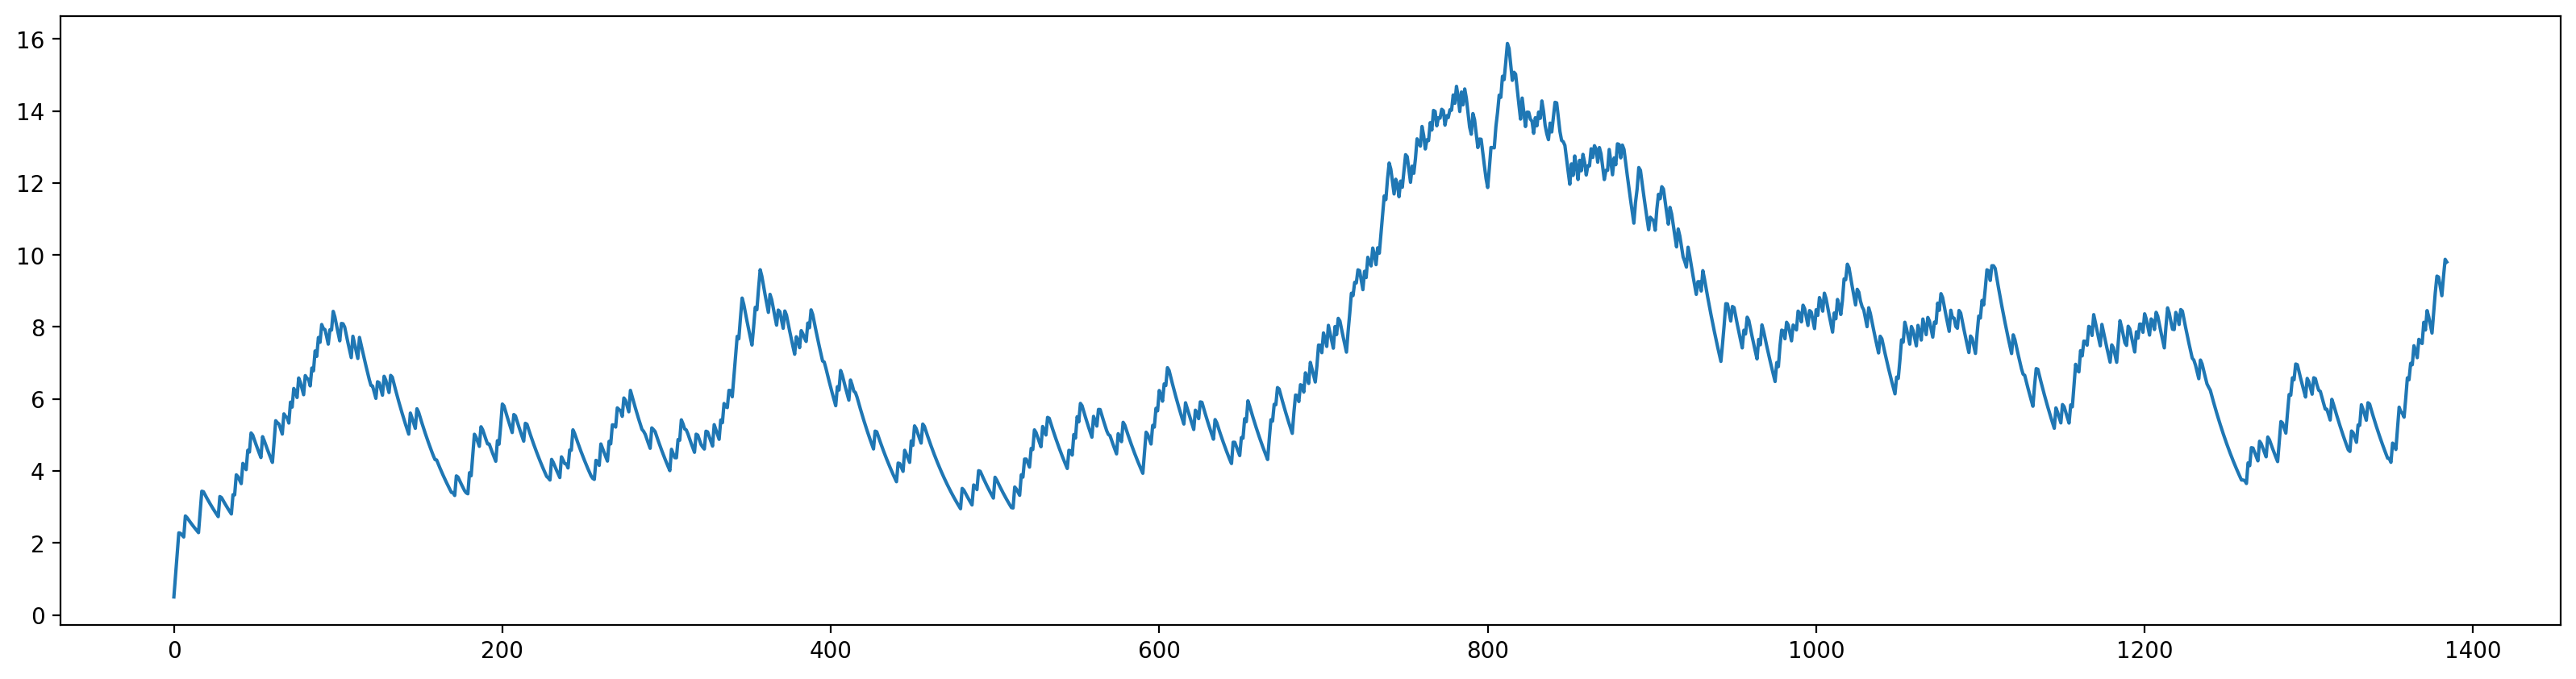

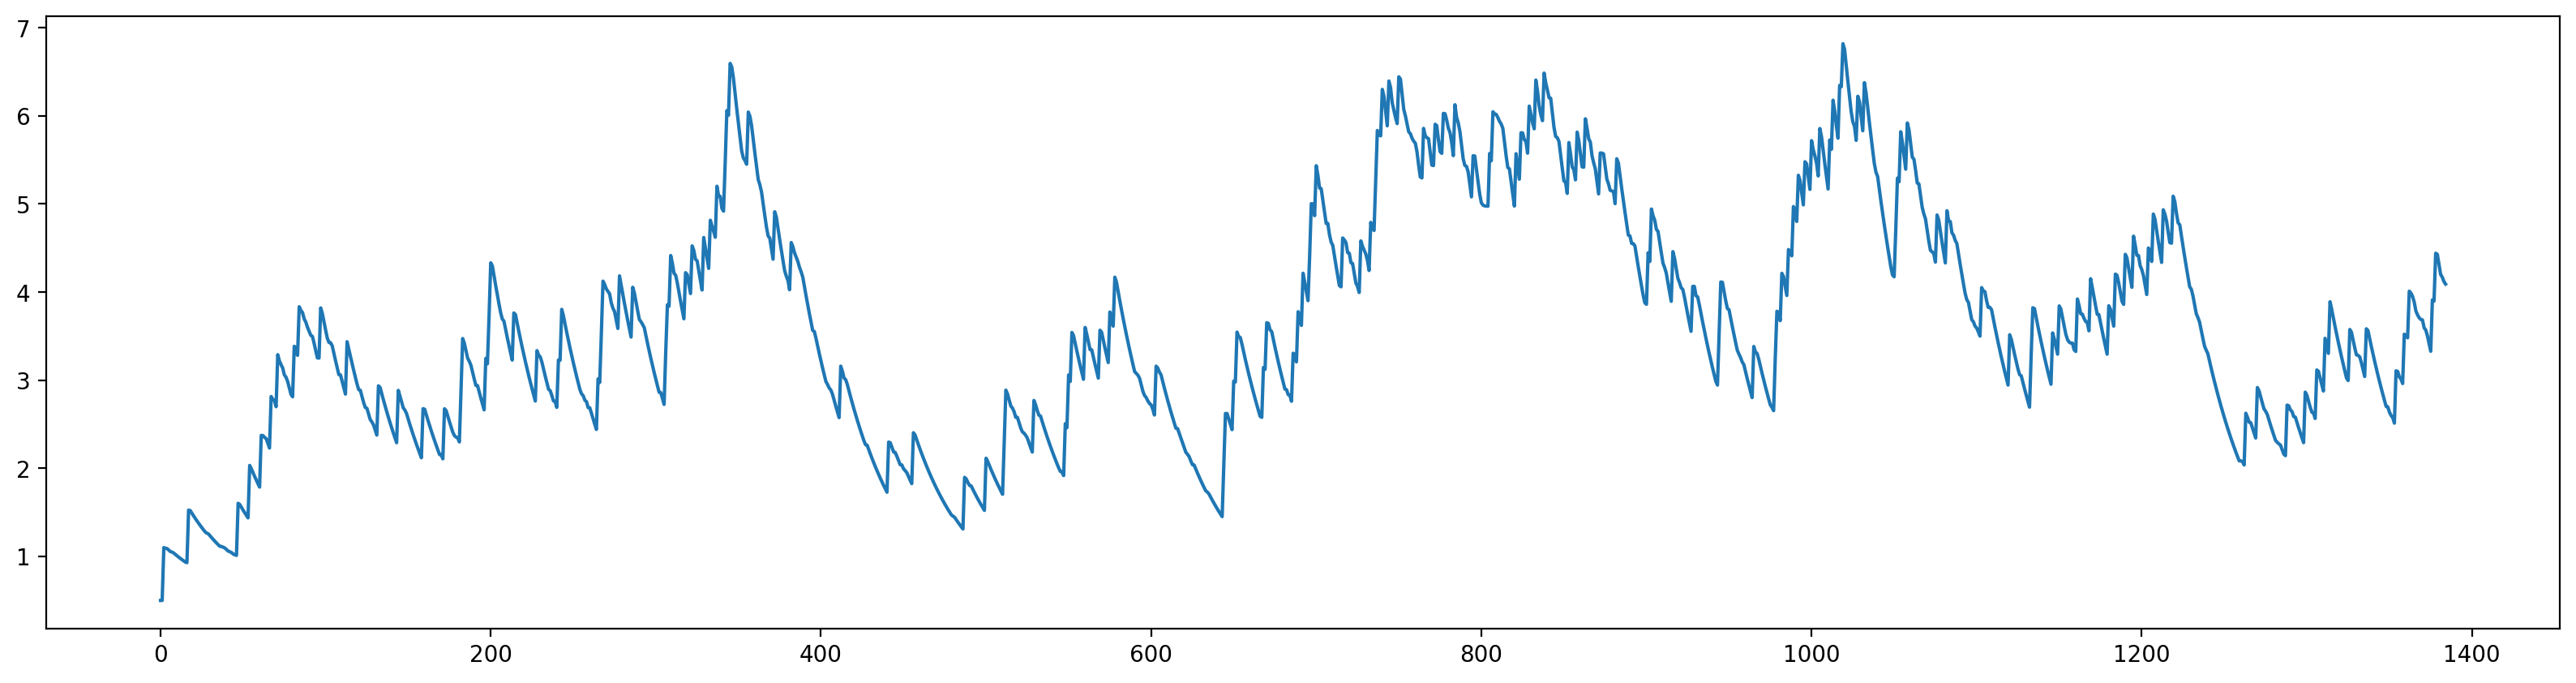

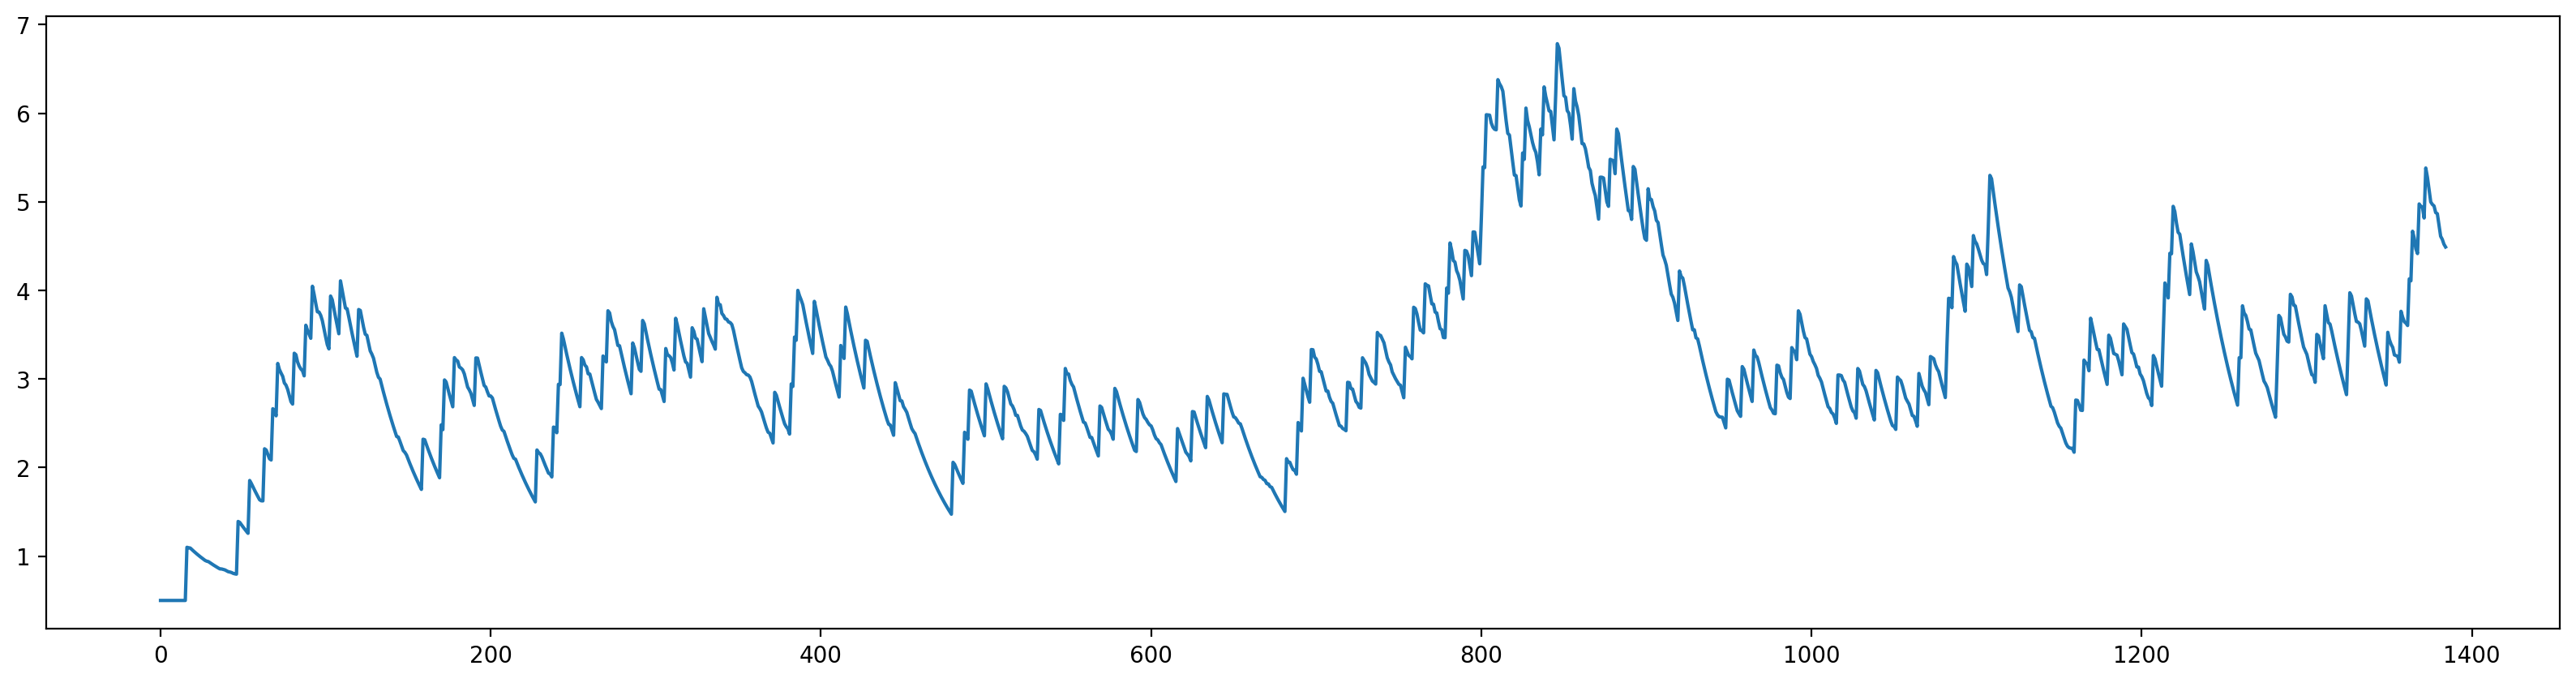

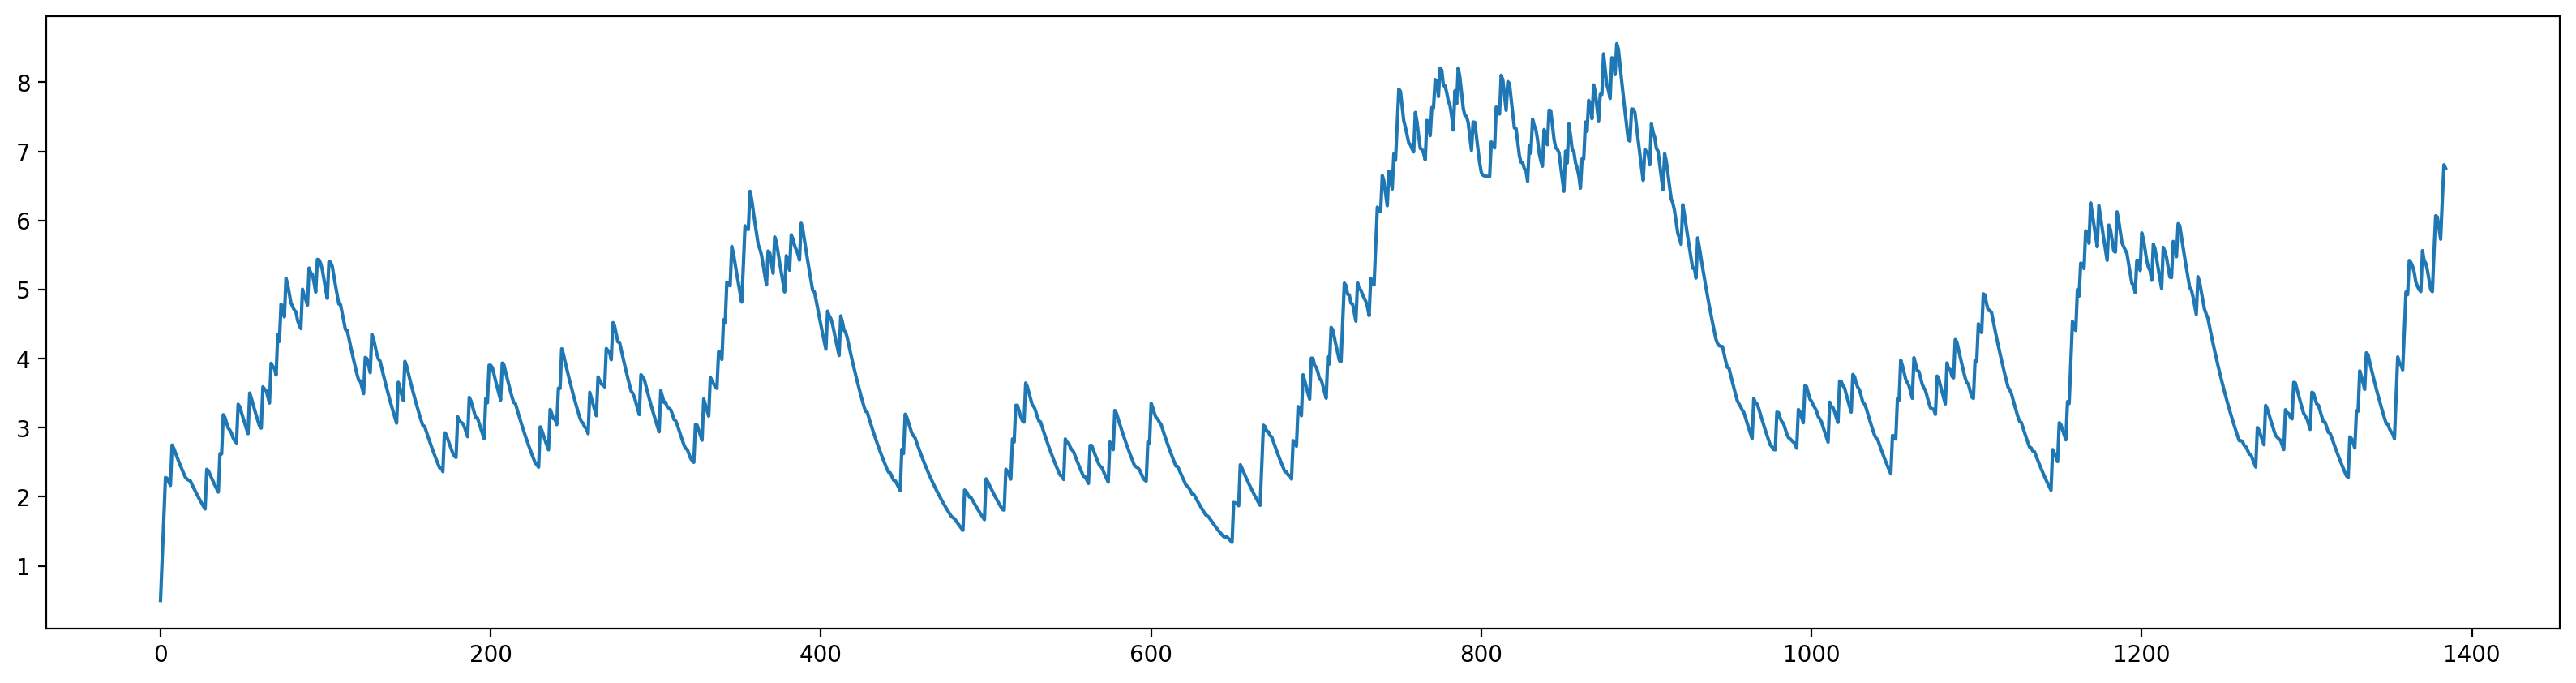

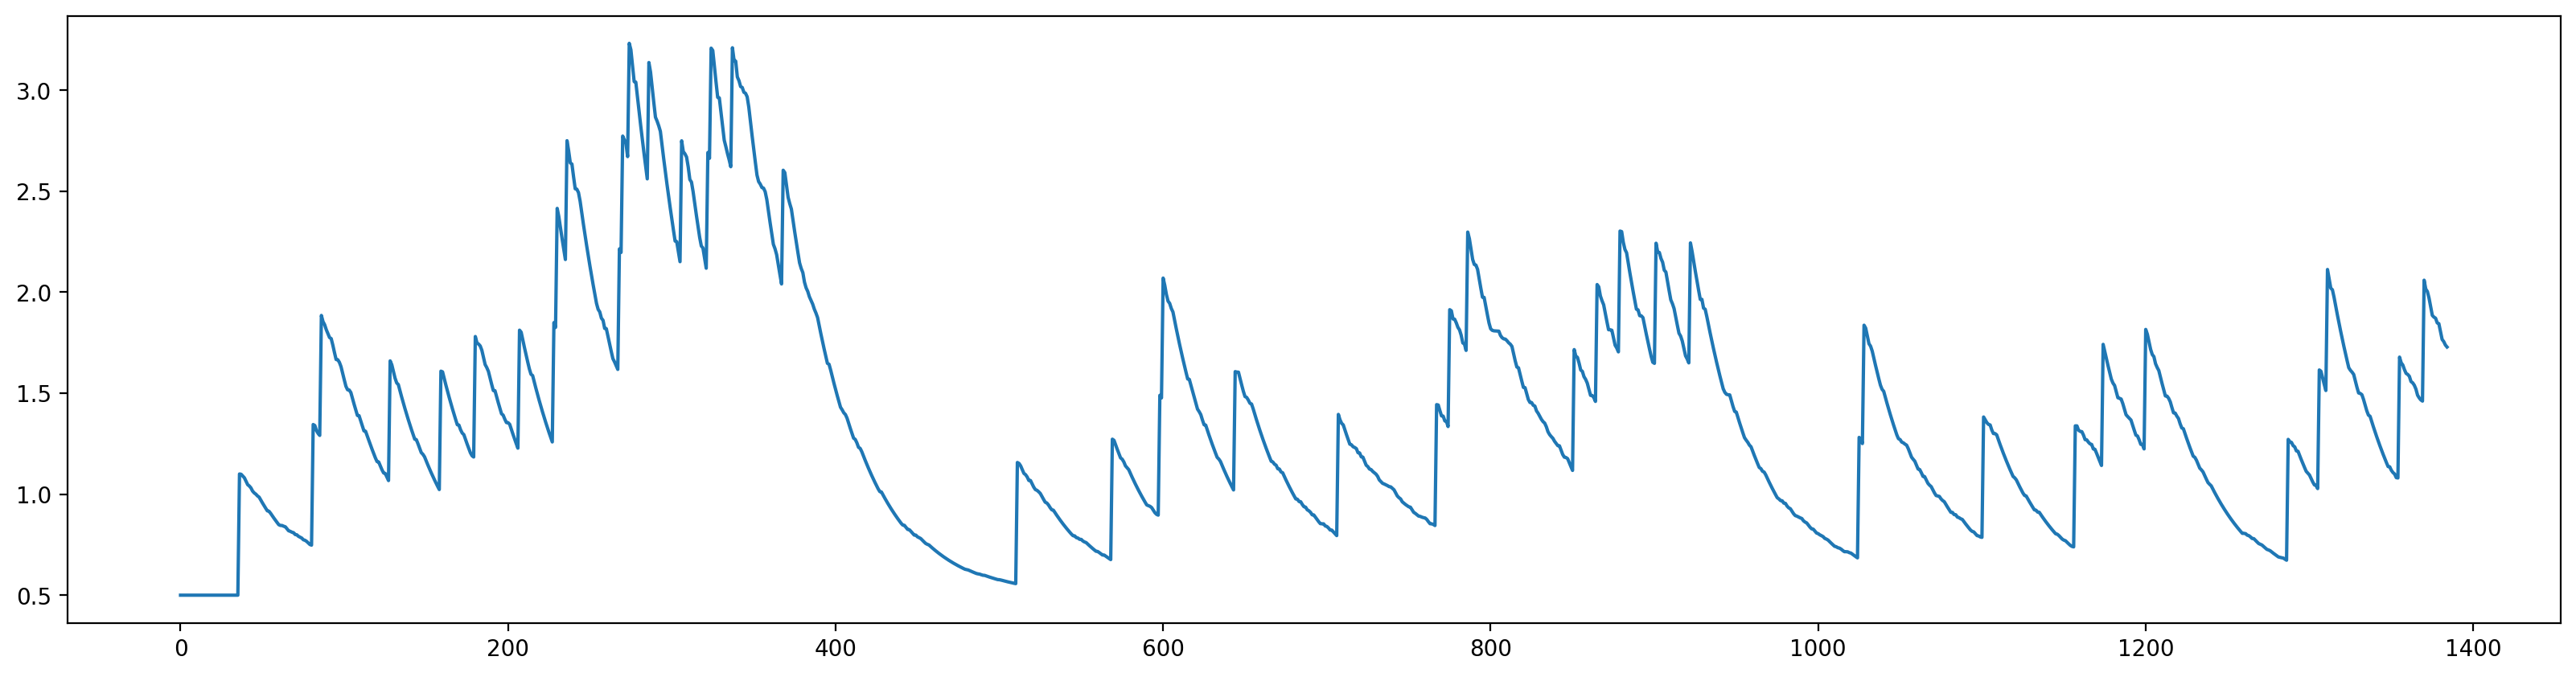

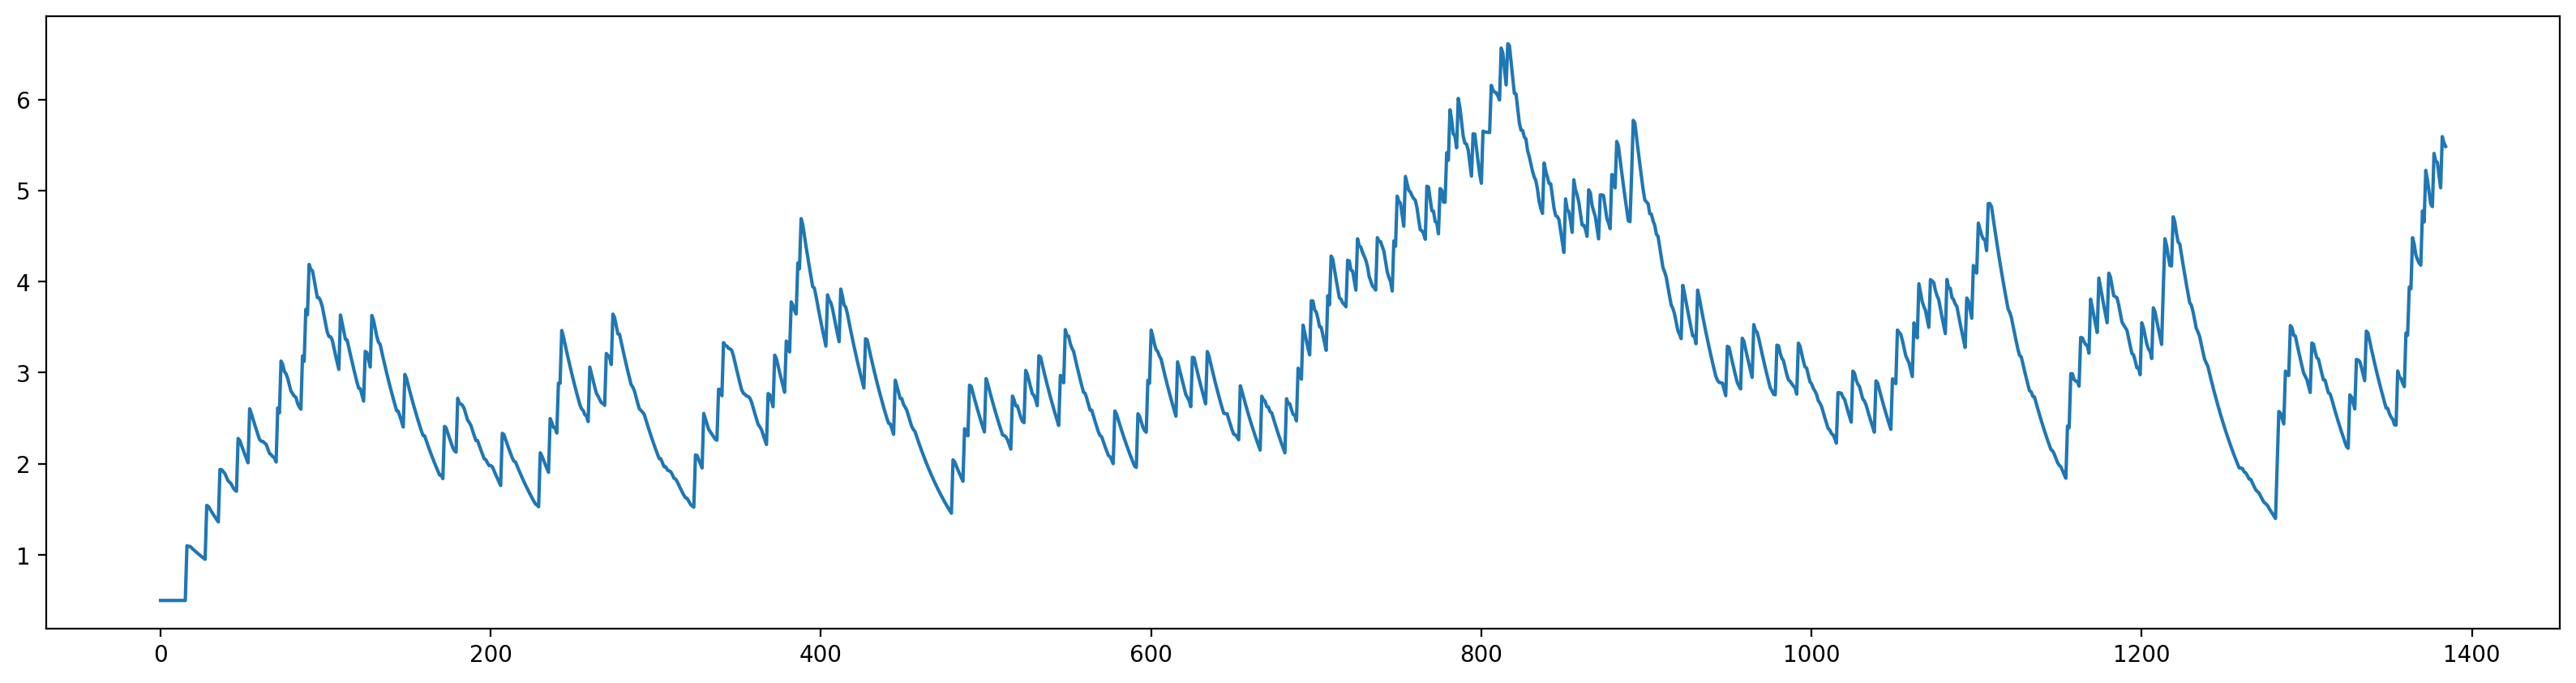

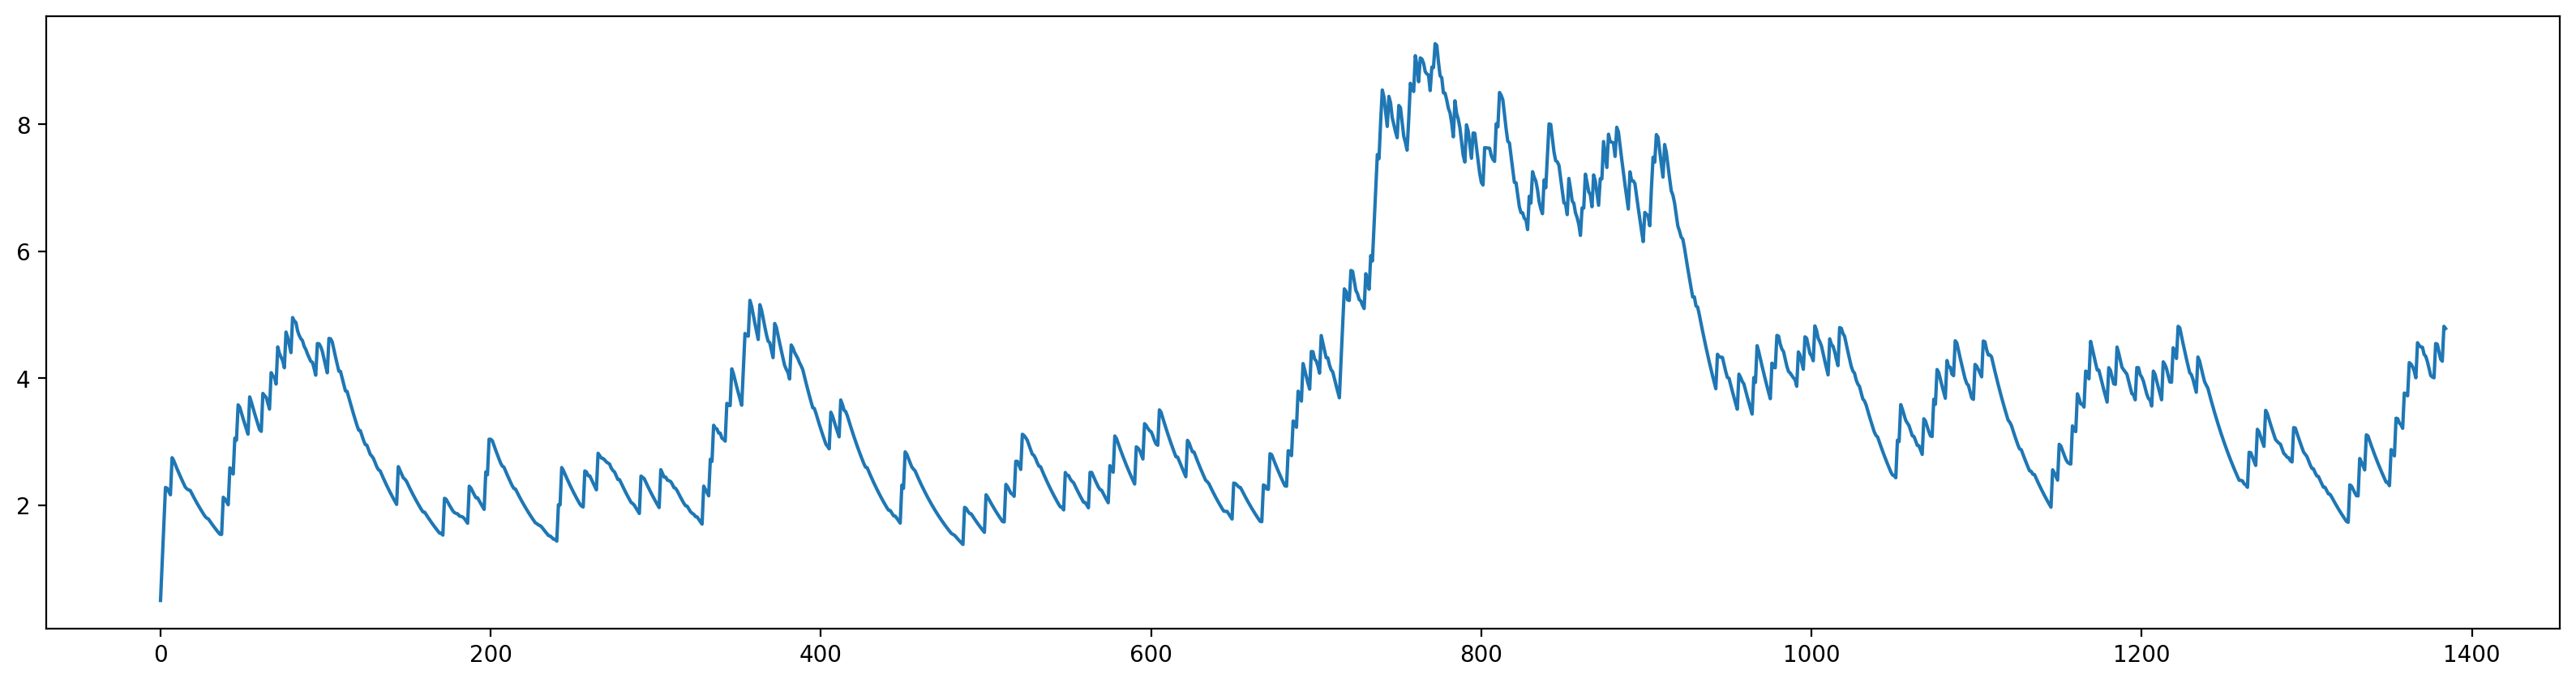

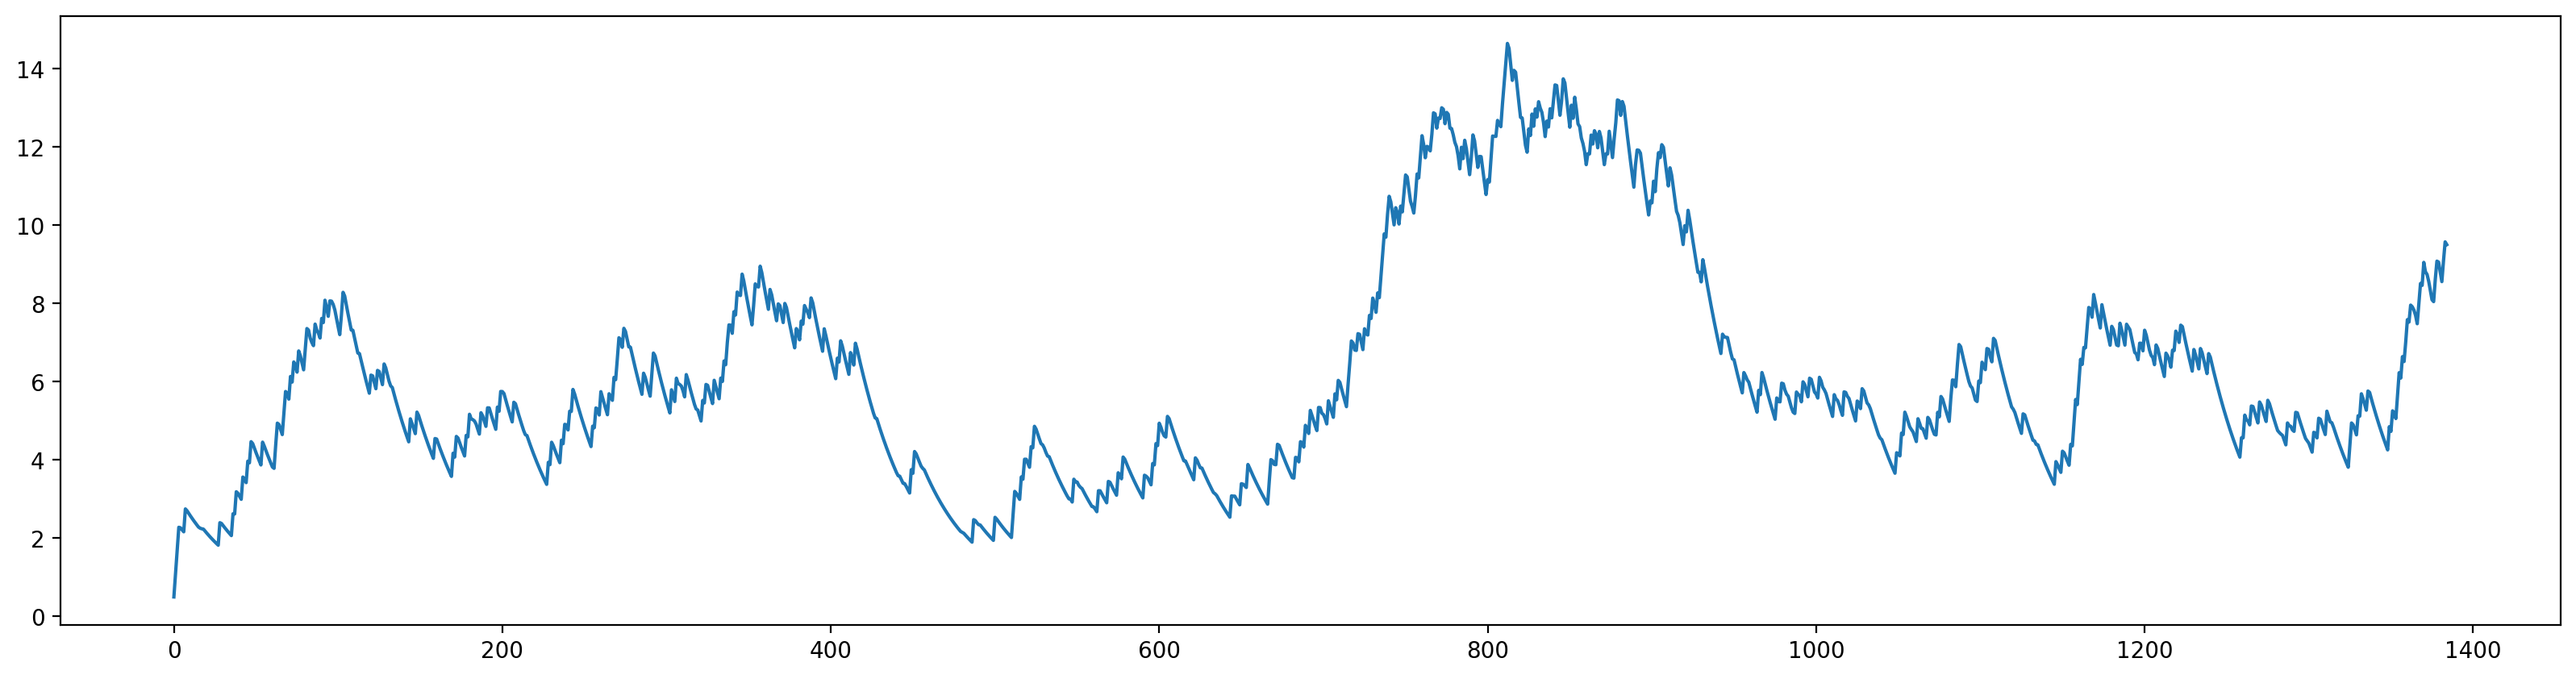

In [9]:
for intensity in intensities[2]:
    plt.figure(figsize=(20, 5), dpi=200)
    plt.plot(intensity)
    plt.show()

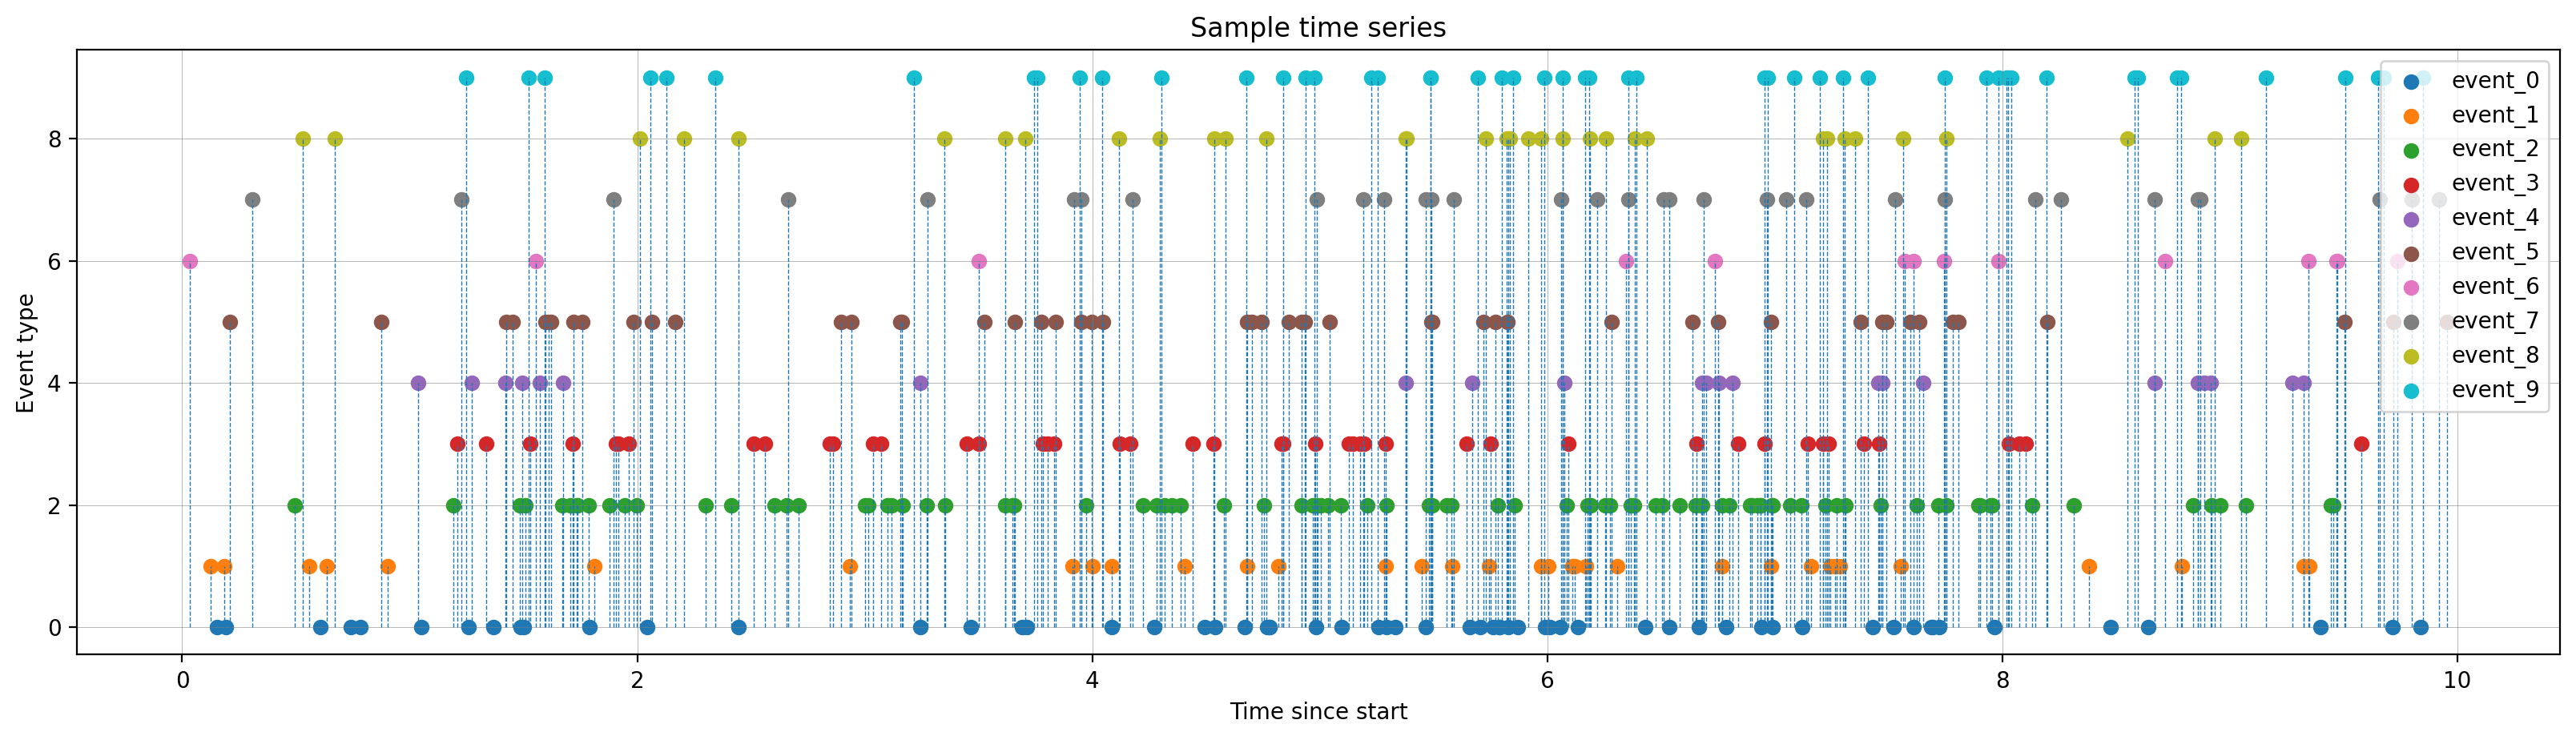

In [11]:
plot_sample_ts(dataset, -1, dim_process)

In [12]:
safe_dataset(f'synth_{dim_process}_events_small', dataset, dim_process, A, intensities)

[{'type_event': 2, 'time_since_start': 0.19385186503897395, 'time_since_last_event': 0.19385186503897395, 'idx_event': 1}, {'type_event': 0, 'time_since_start': 0.25592498033774214, 'time_since_last_event': 0.06207311529876819, 'idx_event': 2}, {'type_event': 9, 'time_since_start': 0.28890947601187933, 'time_since_last_event': 0.03298449567413719, 'idx_event': 3}, {'type_event': 4, 'time_since_start': 0.2976490407017365, 'time_since_last_event': 0.008739564689857149, 'idx_event': 4}, {'type_event': 7, 'time_since_start': 0.45542658838982064, 'time_since_last_event': 0.15777754768808416, 'idx_event': 5}, {'type_event': 5, 'time_since_start': 0.5802645248497919, 'time_since_last_event': 0.12483793645997121, 'idx_event': 6}, {'type_event': 4, 'time_since_start': 0.694306390989328, 'time_since_last_event': 0.11404186613953615, 'idx_event': 7}, {'type_event': 8, 'time_since_start': 0.8575831998817782, 'time_since_last_event': 0.16327680889245022, 'idx_event': 8}, {'type_event': 9, 'time_sin